In [1]:
%reset -f

In [2]:
import glob
import sys
import matplotlib.pyplot as plt
import numpy as np
import os
import numpy as np
import pandas as pd
from scipy.io import loadmat
from scipy.interpolate import make_interp_spline

sys.path.append(os.path.abspath('../../Code/Software/CarDpy-master'))
from cardpy.Sample_Data.Data_Paths import *
from cardpy.Data_Import            import *
from cardpy.Data_Sorting           import *
from cardpy.Data_Processing.DTI    import *
from cardpy.GUI_Tools              import IntERCOMS
from cardpy.GUI_Tools              import IntERVEIW
from cardpy.Colormaps              import *
from cardpy.Data_Saving            import *
from cardpy.Data_Processing.cDTI   import *
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import nrrd

cDTI_cmaps     = cDTI_Colormaps_Generator()



import seaborn as sns
sns.set(style='darkgrid', palette='Set2')

ModuleNotFoundError: No module named 'cardpy'

In [ ]:
volunteer = '/V011'
res = '/vol_3.0res_8.0sl'

main_path                = os.path.abspath('../../Data/NifTi'+volunteer+res+'/ADC_Filtered')
NifTi_path               = glob.glob(os.path.join(main_path, '*Averaged', '*.nii'))[0]
header_path              = glob.glob(os.path.join(main_path, '*Averaged', '*.header'))[0]
b_values_path            = glob.glob(os.path.join(main_path, '*Averaged', '*.bvals'))[0]
b_vectors_path           = glob.glob(os.path.join(main_path, '*Averaged', '*.bvecs'))[0]

main_segmentation_path = os.path.join(os.path.abspath('../../Data/Segmentations'+volunteer+res))
Segmentation_Path        = os.path.join(os.path.abspath('../../Data/Segmentations'+volunteer+res),'Interpolated_mask.mat')
#if os.path.isdir(Segmentation_Path) == False:
#    os.makedirs(Segmentation_Path)

[matrix_stacked, b_vals_stacked, b_vecs_stacked, Header, _, _] = NifTi_Reader(NifTi_path, b_values_path, b_vectors_path, header_path)
myocardium_mask = scipy.io.loadmat(glob.glob(Segmentation_Path)[0])['Mask']
myocardial_mask              = myocardium_mask

/Users/arielhannum/opt/anaconda3/lib/python3.8/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [ ]:
output = IntERVEIW.IntERVEIW_GUI(matrix_stacked[:, :, :, 0])

1
SQUARE
Monitor(x=0, y=0, width=1440, height=900, width_mm=None, height_mm=None, name=None, is_primary=True)
Monitor(x=-3008, y=0, width=3008, height=1253, width_mm=None, height_mm=None, name=None, is_primary=False)
1440
900
900
855x855+0+0


Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/arielhannum/opt/anaconda3/lib/python3.8/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/Users/arielhannum/opt/anaconda3/lib/python3.8/site-packages/tkmacosx/basewidgets/button_base.py", line 893, in cmd
    self.cnf['command']()
  File "/Volumes/T7/Voxel_Bank/Code/Software/CarDpy-master/cardpy/GUI_Tools/IntERVEIW.py", line 417, in <lambda>
    fg = app_txt_col, bg = app_bkg_col, command =lambda: quit_program())
NameError: name 'quit_program' is not defined


In [ ]:
data_list = output

# Define the path to the text file where you want to save the data
file_path = os.path.join(main_segmentation_path, 'RV_Insertion_points.txt')

# Save the list to the text file
with open(file_path, 'w') as file:
    for row in data_list:
        if isinstance(row, list):
            file.write(','.join(map(str, row)) + '\n')
        else:
            file.write(row + '\n')

# AHA Segmentation Functions

In [ ]:
def comprehensive_outter_contour(mask):
    import numpy as np

    rows = mask.shape[0]
    cols = mask.shape[1]

    pos_x_pos_y = np.zeros([rows, cols])
    for x in range(rows):
        stop_flag = 'OFF'
        for y in range(cols):
            if stop_flag == 'OFF':
                if mask[x, y] == 0:
                    pos_x_pos_y[x, y] = 0
                if mask[x, y] == 1:
                    pos_x_pos_y[x, y] = 1
                    stop_flag = 'ON'
            if stop_flag == 'ON':
                break
    pos_x_neg_y = np.zeros([rows, cols])
    for x in range(rows):
        stop_flag = 'OFF'
        for y in range(cols):
            if stop_flag == 'OFF':
                if mask[x, cols - 1 - y] == 0:
                    pos_x_pos_y[x, cols - 1 - y] = 0
                if mask[x, cols - 1 - y] == 1:
                    pos_x_pos_y[x, cols - 1 - y] = 1
                    stop_flag = 'ON'
            if stop_flag == 'ON':
                break
    neg_x_neg_y = np.zeros([rows, cols])
    for x in range(rows):
        stop_flag = 'OFF'
        for y in range(cols):
            if stop_flag == 'OFF':
                if mask[rows - 1 - x, cols - 1 - y] == 0:
                    pos_x_pos_y[rows - 1 - x, cols - 1 - y] = 0
                if mask[rows - 1 - x, cols - 1 - y] == 1:
                    pos_x_pos_y[rows - 1 - x, cols - 1 - y] = 1
                    stop_flag = 'ON'
            if stop_flag == 'ON':
                break
    neg_x_pos_y = np.zeros([rows, cols])
    for x in range(rows):
        stop_flag = 'OFF'
        for y in range(cols):
            if stop_flag == 'OFF':
                if mask[rows - 1 - x, y] == 0:
                    pos_x_pos_y[rows - 1 - x, y] = 0
                if mask[rows - 1 - x, y] == 1:
                    pos_x_pos_y[rows - 1 - x, y] = 1
                    stop_flag = 'ON'
            if stop_flag == 'ON':
                break
    ###
    pos_y_pos_x = np.zeros([rows, cols])
    for y in range(cols):
        stop_flag = 'OFF'
        for x in range(rows):
            if stop_flag == 'OFF':
                if mask[x, y] == 0:
                    pos_y_pos_x[x, y] = 0
                if mask[x, y] == 1:
                    pos_y_pos_x[x, y] = 1
                    stop_flag = 'ON'
            if stop_flag == 'ON':
                break
    pos_y_neg_x = np.zeros([rows, cols])
    for y in range(cols):
        stop_flag = 'OFF'
        for x in range(rows):
            if stop_flag == 'OFF':
                if mask[rows - 1 - x, y] == 0:
                    pos_y_neg_x[rows - 1 - x, y] = 0
                if mask[rows - 1 - x, y] == 1:
                    pos_y_neg_x[rows - 1 - x, y] = 1
                    stop_flag = 'ON'
            if stop_flag == 'ON':
                break
    neg_y_neg_x = np.zeros([rows, cols])
    for y in range(cols):
        stop_flag = 'OFF'
        for x in range(rows):
            if stop_flag == 'OFF':
                if mask[rows - 1 - x, cols - 1 - y] == 0:
                    neg_y_neg_x[rows - 1 - x, cols - 1 - y] = 0
                if mask[rows - 1 - x, cols - 1 - y] == 1:
                    neg_y_neg_x[rows - 1 - x, cols - 1 - y] = 1
                    stop_flag = 'ON'
            if stop_flag == 'ON':
                break
    neg_y_pos_x = np.zeros([rows, cols])
    for y in range(cols):
        stop_flag = 'OFF'
        for x in range(rows):
            if stop_flag == 'OFF':
                if mask[x, cols - 1 - y] == 0:
                    neg_y_pos_x[x, cols - 1 - y] = 0
                if mask[x, cols - 1 - y] == 1:
                    neg_y_pos_x[x, cols - 1 - y] = 1
                    stop_flag = 'ON'
            if stop_flag == 'ON':
                break
    x_all = pos_x_pos_y + pos_x_neg_y + neg_x_neg_y + neg_x_pos_y
    y_all = pos_y_pos_x + pos_y_neg_x + neg_y_neg_x + neg_y_pos_x
    contour = x_all + y_all
    contour[contour >= 1] = 1
    return contour

In [ ]:
def comprehensive_inner_contour(mask, offset_x, offset_y):
    import numpy as np
    rows = mask.shape[0]
    cols = mask.shape[1]

    pos_x_pos_y = np.zeros([rows, cols])
    pos_x_pos_y = np.zeros([rows, cols])
    for x in range(rows - offset_x):
        stop_flag = 'OFF'
        if mask[x + offset_x, 0 + offset_y] == 1:
            stop_flag = 'ON'
        for y in range(cols - offset_y):
            if stop_flag == 'OFF':
                if mask[x + offset_x, y + offset_y] == 0:
                    pos_x_pos_y[x + offset_x, y + offset_y] = 0
                if mask[x + offset_x, y + offset_y] == 1:
                    pos_x_pos_y[x + offset_x, y + offset_y] = 1
                    stop_flag = 'ON'
            if stop_flag == 'ON':
                break
    pos_x_neg_y = np.zeros([rows, cols])
    for x in range(rows - offset_x):
        stop_flag = 'OFF'
        if mask[x + offset_x, offset_y - 0] == 1:
            stop_flag = 'ON'
        for y in range(offset_y + 1):
            if stop_flag == 'OFF':
                if mask[x + offset_x, offset_y - y] == 0:
                    pos_x_neg_y[x + offset_x, offset_y - y] = 0
                if mask[x + offset_x, offset_y - y] == 1:
                    pos_x_neg_y[x + offset_x, offset_y - y] = 1
                    stop_flag = 'ON'
            if stop_flag == 'ON':
                break
    neg_x_neg_y = np.zeros([rows, cols])
    for x in range(offset_x + 1):
        stop_flag = 'OFF'
        if mask[offset_x - x, offset_y - 0] == 1:
            stop_flag = 'ON'
        for y in range(offset_y + 1):
            if stop_flag == 'OFF':
                if mask[offset_x - x, offset_y - y] == 0:
                    neg_x_neg_y[offset_x - x, offset_y - y] = 0
                if mask[offset_x - x, offset_y - y] == 1:
                    neg_x_neg_y[offset_x - x, offset_y - y] = 1
                    stop_flag = 'ON'
            if stop_flag == 'ON':
                break
    neg_x_pos_y = np.zeros([rows, cols])
    for x in range(offset_x + 1):
        stop_flag = 'OFF'
        if mask[offset_x - x, 0 + offset_y] == 1:
            stop_flag = 'ON'
        for y in range(cols - offset_y):
            if stop_flag == 'OFF':
                if mask[offset_x - x, y + offset_y] == 0:
                    neg_x_pos_y[offset_x - x, y + offset_y] = 0
                if mask[offset_x - x, y + offset_y] == 1:
                    neg_x_pos_y[offset_x - x, y + offset_y] = 1
                    stop_flag = 'ON'
            if stop_flag == 'ON':
                break
    ###
    pos_y_pos_x = np.zeros([rows, cols])
    for y in range(cols - offset_y):
        stop_flag = 'OFF'
        if mask[0 + offset_x, y + offset_y] == 1:
            stop_flag = 'ON'
        for x in range(rows - offset_x):
            if stop_flag == 'OFF':
                if mask[x + offset_x, y + offset_y] == 0:
                    pos_y_pos_x[x + offset_x, y + offset_y] = 0
                if mask[x + offset_x, y + offset_y] == 1:
                    pos_y_pos_x[x + offset_x, y + offset_y] = 1
                    stop_flag = 'ON'
            if stop_flag == 'ON':
                break
    neg_y_pos_x = np.zeros([rows, cols])
    for y in range(offset_y + 1):
        stop_flag = 'OFF'
        if mask[0 + offset_x, offset_y - y] == 1:
            stop_flag = 'ON'
        for x in range(rows - offset_x):
            if stop_flag == 'OFF':
                if mask[x + offset_x, offset_y - y] == 0:
                    neg_y_pos_x[x + offset_x, offset_y - y] = 0
                if mask[x + offset_x, offset_y - y] == 1:
                    neg_y_pos_x[x + offset_x, offset_y - y] = 1
                    stop_flag = 'ON'
            if stop_flag == 'ON':
                break
    neg_y_neg_x = np.zeros([rows, cols])
    for y in range(offset_y + 1):
        stop_flag = 'OFF'
        if mask[offset_x - 0, offset_y - y] == 1:
            stop_flag = 'ON'
        for x in range(offset_x + 1):
            if stop_flag == 'OFF':
                if mask[offset_x - x, offset_y - y] == 0:
                    neg_y_neg_x[offset_x - x, offset_y - y] = 0
                if mask[offset_x - x, offset_y - y] == 1:
                    neg_y_neg_x[offset_x - x, offset_y - y] = 1
                    stop_flag = 'ON'
            if stop_flag == 'ON':
                break
    pos_y_neg_x = np.zeros([rows, cols])
    for y in range(cols - offset_y):
        stop_flag = 'OFF'
        if mask[offset_x - 0, y + offset_y] == 1:
            stop_flag = 'ON'
        for x in range(offset_x + 1):
            if stop_flag == 'OFF':
                if mask[offset_x - x, y + offset_y] == 0:
                    pos_y_neg_x[offset_x - x, y + offset_y] = 0
                if mask[offset_x - x, y + offset_y] == 1:
                    pos_y_neg_x[offset_x - x, y + offset_y] = 1
                    stop_flag = 'ON'
            if stop_flag == 'ON':
                break

    x_all = pos_x_pos_y + pos_x_neg_y + neg_x_neg_y + neg_x_pos_y
    y_all = pos_y_pos_x + pos_y_neg_x + neg_y_neg_x + neg_y_pos_x
    contour = x_all + y_all
    contour[contour >= 1] = 1
    return contour

In [ ]:
def myocarial_contour_extraction(mask):
    import numpy as np
    import skimage
    rows = mask.shape[0] 
    cols = mask.shape[1] 
    slcs = mask.shape[2] 
    Background_Mask = np.zeros([rows, cols, slcs])
    Myocardial_Mask = np.zeros([rows, cols, slcs])
    Blood_Pool_Mask = np.zeros([rows, cols, slcs])
    Endocardial_Centers  = []
    Epicardium_Contours  = []
    Endocardium_Contours = []
    for slc in range(mask.shape[2]):
        Epicardium_Contours.append([])
        Endocardium_Contours.append([])
        Endocardial_Centers.append([])
        Background_temp = np .zeros([rows, cols])
        Myocardium_temp = np .zeros([rows, cols])
        Blood_Pool_temp = np .zeros([rows, cols])
        Mask_Label = skimage.measure.label(abs(mask[:, :, slc] - 1), 
                                           background = None, 
                                           return_num = False, 
                                           connectivity = 1)
         
        Background_temp[Mask_Label == 1] = 1
        Myocardium_temp[Mask_Label == 0] = 1
        Blood_Pool_temp[Mask_Label == 2] = 1
        
        Background_Mask[:, :, slc] = Background_temp
        Myocardial_Mask[:, :, slc] = Myocardium_temp
        Blood_Pool_Mask[:, :, slc] = Blood_Pool_temp
        
        [x_coordinates_endo,  y_coordinates_endo] = np.where(Blood_Pool_temp == 1)
        mean_y_coordinates_endo  = np.int64(np.round(np.mean(y_coordinates_endo)))
        mean_x_coordinates_endo  = np.int64(np.round(np.mean(x_coordinates_endo)))
        Endocardial_Centers[slc] = [mean_x_coordinates_endo, mean_y_coordinates_endo]
        
        epicardium_contour  = comprehensive_outter_contour(Myocardial_Mask[:, :, slc])
        endocardium_contour = comprehensive_inner_contour(Myocardial_Mask[:, :, slc], 
                                                          np.int64(Endocardial_Centers[slc][0]),
                                                          np.int64(Endocardial_Centers[slc][1]))
        Epicardium_Contours[slc]  = epicardium_contour
        Endocardium_Contours[slc] = endocardium_contour
    return [Epicardium_Contours, Endocardium_Contours, Endocardial_Centers]

In [ ]:
def Mid_Septum_Calculation(Anterior_RVIP, Inferior_RVIP, Endocardial_Centers):
    import numpy as np
    slcs = len(Anterior_RVIP)
    Mid_Septum = []
    for slc in range(slcs):
        Mid_Septum.append([])
        ### Caluclate angle between Anterior and Inferior Septum 
        point_ARVIP   = np.array([Anterior_RVIP[slc][0],  Anterior_RVIP[slc][1]])                                                                                           # Static (reference) point
        point_IRVIP   = np.array([Inferior_RVIP[slc][0],  Inferior_RVIP[slc][1]])                                                                                           # Static (reference) point
        point_origin  = np.array([Endocardial_Centers[slc][0], Endocardial_Centers[slc][1]])                                                                                            # Origin point
        vector_ARVIP  = point_ARVIP - point_origin                                                                                 # Static (reference) vector
        vector_IRVIP  = point_IRVIP - point_origin 
        #             theta         = np.degrees(angle_between(vector_static, vector_moving))
        radians = np.arctan2(np.cross(vector_ARVIP, vector_IRVIP), np.dot(vector_ARVIP, vector_IRVIP))
        theta   = np.degrees(radians)
        theta = theta
        
        mid_angle = theta / 2
        
        Septum = np.array(rotate_vector(point_ARVIP - point_origin, np.radians(mid_angle)))
        Mid_Septum[slc] = Septum + point_origin
        
    return Mid_Septum

In [ ]:
def rotate_vector(vector, angle):
    import math
    x = vector[0] * math.cos(angle) - vector[1] * math.sin(angle)
    y = vector[0] * math.sin(angle) + vector[1] * math.cos(angle)
    return [x, y]

In [ ]:
def Snap_Septal_Points(Anterior_RVIP, Inferior_RVIP, Mid_Septum, Epicardium_Contours):
    import numpy as np
    import math
    slcs = len(Anterior_RVIP)
    Anterior_RVIP_snap = []
    Inferior_RVIP_snap = []
    Mid_Septum_snap    = []
    for slc in range(slcs):
        Anterior_RVIP_snap.append([])
        Inferior_RVIP_snap.append([])
        Mid_Septum_snap.append([])
        [x_epicardium,  y_epicardium] = np.where(Epicardium_Contours[slc]  == 1)
        Anterior_Distance = []
        Interior_Distance = []
        Septal_Distance   = []
        for index in range(x_epicardium.shape[0]):
            ARVIP  = Anterior_RVIP[slc]
            IRVIP  = Inferior_RVIP[slc]
            Septum = Mid_Septum[slc]
            epicardium_contour = [x_epicardium[index],  y_epicardium[index]]
            Anterior_Distance.append(math.dist(ARVIP, epicardium_contour))
            Interior_Distance.append(math.dist(IRVIP, epicardium_contour))
            Septal_Distance.append(math.dist(Septum, epicardium_contour))
        min_ARVIP_index  = np.argmin(Anterior_Distance)    
        min_IRVIP_index  = np.argmin(Interior_Distance)    
        min_Septum_index = np.argmin(Septal_Distance)    

        Anterior_RVIP_snap[slc] = [x_epicardium[min_ARVIP_index],  y_epicardium[min_ARVIP_index]]
        Inferior_RVIP_snap[slc] = [x_epicardium[min_IRVIP_index],  y_epicardium[min_IRVIP_index]]
        Mid_Septum_snap[slc]    = [x_epicardium[min_Septum_index], y_epicardium[min_Septum_index]]
    return [Anterior_RVIP_snap, Inferior_RVIP_snap, Mid_Septum_snap]

In [ ]:
def AHA_17_Segment_Mask(mask, Slice_Location, Anterior_RVIP, Mid_Septum, Inferior_RVIP, Endocardial_Centers):
    import numpy as np
    rows = mask.shape[0]
    cols = mask.shape[1]
    slcs = mask.shape[2]
    AHA_Mask = np.empty([rows, cols, slcs])
    AHA_Mask.fill(np.nan)
    for slc in range(slcs):
        if Slice_Location[slc] == 'Basal':
            ### Caluclate angle between Anterior and Inferior Septum 
            point_ARVIP   = np.array([Anterior_RVIP[slc][0],       Anterior_RVIP[slc][1]])                                                                                           # Static (reference) point
            point_IRVIP   = np.array([Inferior_RVIP[slc][0],       Inferior_RVIP[slc][1]])                                                                                           # Static (reference) point
            point_origin  = np.array([Endocardial_Centers[slc][0], Endocardial_Centers[slc][1]])                                                                                         # Origin point
            vector_ARVIP  = point_ARVIP - point_origin                                                                                 # Static (reference) vector
            vector_IRVIP  = point_IRVIP - point_origin 
            radians       = np.arctan2(np.cross(vector_ARVIP, vector_IRVIP), np.dot(vector_ARVIP, vector_IRVIP))
            Septal_Angle  = np.degrees(radians)
            Mid_Septum_Angle = Septal_Angle / 2
            Remainder_Angles = (360 - Septal_Angle) / 4
            ### Regions 1 - 6
            theta_06  = (Mid_Septum_Angle + Remainder_Angles * 2) * -1
            theta_01  = (Mid_Septum_Angle + Remainder_Angles * 1) * -1
            theta_02  = (Mid_Septum_Angle + Remainder_Angles * 0) * -1
            theta_ref = 0
            theta_03  = (Mid_Septum_Angle + Remainder_Angles * 0) * 1
            theta_04  = (Mid_Septum_Angle + Remainder_Angles * 1) * 1
            theta_05  = (Mid_Septum_Angle + Remainder_Angles * 2) * 1
            for x in range(rows):
                for y in range(cols):
                    if mask[x, y, slc] == 1:
                        point_static  = np.array([Mid_Septum[slc][0],          Mid_Septum[slc][1]])                                                                                           # Static (reference) point
                        point_origin  = np.array([Endocardial_Centers[slc][0], Endocardial_Centers[slc][1]])                                                                                            # Origin point
                        point_moving  = np.array([x, y])  
                        vector_static = point_static - point_origin                                                                                 # Static (reference) vector
                        vector_moving = point_moving - point_origin 
                        radians = np.arctan2(np.cross(vector_static, vector_moving), np.dot(vector_static, vector_moving))
                        theta   = np.degrees(radians)
                        theta = theta
                        if (theta >= theta_06 and theta < theta_01):
                            AHA_Mask[x, y, slc] = 6   
                        if (theta >= theta_01 and theta < theta_02):
                            AHA_Mask[x, y, slc] = 1  
                        if (theta >= theta_02 and theta < theta_ref):
                            AHA_Mask[x, y, slc] = 2              
                        if (theta >= theta_ref and theta < theta_03):
                            AHA_Mask[x, y, slc] = 3  
                        if (theta >= theta_03 and theta < theta_04):
                            AHA_Mask[x, y, slc] = 4
                        if (theta >= theta_04 and theta <= theta_05):
                            AHA_Mask[x, y, slc] = 5
        if Slice_Location[slc] == 'Mid':
            print('hi')
            ### Caluclate angle between Anterior and Inferior Septum 
            point_ARVIP   = np.array([Anterior_RVIP[slc][0],       Anterior_RVIP[slc][1]])                                                                                           # Static (reference) point
            point_IRVIP   = np.array([Inferior_RVIP[slc][0],       Inferior_RVIP[slc][1]])                                                                                           # Static (reference) point
            point_origin  = np.array([Endocardial_Centers[slc][0], Endocardial_Centers[slc][1]])                                                                                         # Origin point
            vector_ARVIP  = point_ARVIP - point_origin                                                                                 # Static (reference) vector
            vector_IRVIP  = point_IRVIP - point_origin 
            radians       = np.arctan2(np.cross(vector_ARVIP, vector_IRVIP), np.dot(vector_ARVIP, vector_IRVIP))
            Septal_Angle  = np.degrees(radians)
            Mid_Septum_Angle = Septal_Angle / 2
            Remainder_Angles = (360 - Septal_Angle) / 4
            ### Regions 7 - 12
            theta_12  = (Mid_Septum_Angle + Remainder_Angles * 2) * -1
            theta_07  = (Mid_Septum_Angle + Remainder_Angles * 1) * -1
            theta_08  = (Mid_Septum_Angle + Remainder_Angles * 0) * -1
            theta_ref = 0
            theta_09  = (Mid_Septum_Angle + Remainder_Angles * 0) * 1
            theta_10  = (Mid_Septum_Angle + Remainder_Angles * 1) * 1
            theta_11  = (Mid_Septum_Angle + Remainder_Angles * 2) * 1
            for x in range(rows):
                for y in range(cols):
                    if mask[x, y, slc] == 1:
                        point_static  = np.array([Mid_Septum[slc][0],          Mid_Septum[slc][1]])                                                                                           # Static (reference) point
                        point_origin  = np.array([Endocardial_Centers[slc][0], Endocardial_Centers[slc][1]])                                                                                            # Origin point
                        point_moving  = np.array([x, y])  
                        vector_static = point_static - point_origin                                                                                 # Static (reference) vector
                        vector_moving = point_moving - point_origin 
                        radians = np.arctan2(np.cross(vector_static, vector_moving), np.dot(vector_static, vector_moving))
                        theta   = np.degrees(radians)
                        theta = theta
                        if (theta >= theta_12 and theta < theta_07):
                            AHA_Mask[x, y, slc] = 12   
                        if (theta >= theta_07 and theta < theta_08):
                            AHA_Mask[x, y, slc] = 7  
                        if (theta >= theta_08 and theta < theta_ref):
                            AHA_Mask[x, y, slc] = 8              
                        if (theta >= theta_ref and theta < theta_09):
                            AHA_Mask[x, y, slc] = 9  
                        if (theta >= theta_09 and theta < theta_10):
                            AHA_Mask[x, y, slc] = 10
                        if (theta >= theta_10 and theta <= theta_11):
                            AHA_Mask[x, y, slc] = 11
        if Slice_Location[slc] == 'Apical':        
            ### Regions 13 - 16
            for x in range(rows):
                for y in range(cols):
                    if mask[x, y, slc] == 1:
                        point_static  = np.array([Mid_Septum[slc][0],          Mid_Septum[slc][1]])                                                                                           # Static (reference) point
                        point_origin  = np.array([Endocardial_Centers[slc][0], Endocardial_Centers[slc][1]])                                                                                            # Origin point
                        point_moving  = np.array([x, y]) 
                        vector_static = point_static - point_origin                                                                                 # Static (reference) vector
                        vector_moving = point_moving - point_origin 
                        radians = np.arctan2(np.cross(vector_static, vector_moving), np.dot(vector_static, vector_moving))
                        theta   = np.degrees(radians)
                        theta   = theta
                        if (theta > -135 and theta < -45):
                            AHA_Mask[x, y, slc] = 13   
                        if (theta >= -45 and theta <= 45):
                            AHA_Mask[x, y, slc] = 14  
                        if (theta > 45 and theta < 135):
                            AHA_Mask[x, y, slc] = 15 
                        if (theta >= 135 or theta <= -135):
                            AHA_Mask[x, y, slc] = 16 
        if Slice_Location[slc] == 'Apex':        
            ### Regions 13 - 16
            for x in range(rows):
                for y in range(cols):
                    if mask[x, y, slc] == 1:
                        AHA_Mask[x, y, slc] = 17

    return AHA_Mask


# AHA Segmentation Process

In [ ]:
LV_Mask = myocardial_mask
Slice_Location = ['Mid']
Anterior_RVIP = output[1]
Inferior_RVIP = output[2]
[Epicardium_Contours, Endocardium_Contours, Endocardial_Centers] = myocarial_contour_extraction(LV_Mask)
Mid_Septum = Mid_Septum_Calculation(Anterior_RVIP, Inferior_RVIP, Endocardial_Centers)

In [ ]:
[Anterior_RVIP_snap, Inferior_RVIP_snap, Mid_Septum_snap] = Snap_Septal_Points(Anterior_RVIP, Inferior_RVIP, Mid_Septum, Epicardium_Contours)

In [ ]:
Anterior_RVIP_snap, Inferior_RVIP_snap, Epicardium_Contours[0].shape

([[10, 30]], [[21, 18]], (40, 40))

# Contours

Circumferential Distance is 14.19 pixels
Circumferential Distance is 20.59 pixels
Radial differnce is: 1.84 pixels


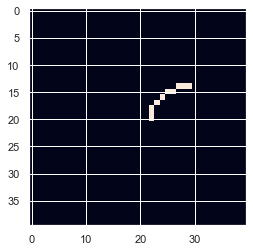

In [ ]:
# contour between Anterior_RVIP_snap and Inferior_RVIP_snap

import cv2
### Caluclate angle between Anterior and Inferior Septum 
slc = 0 
point_ARVIP   = np.array([Anterior_RVIP[slc][0],       Anterior_RVIP[slc][1]])  # Can think of as Point A                                                                                         # Static (reference) point
point_IRVIP   = np.array([Inferior_RVIP[slc][0],       Inferior_RVIP[slc][1]])   # Can think of this as Point B                                                                                        # Static (reference) point
point_origin  = np.array([Endocardial_Centers[slc][0], Endocardial_Centers[slc][1]])                                                                                         # Origin point
vector_ARVIP  = point_ARVIP - point_origin                                                                                 # Static (reference) vector
vector_IRVIP  = point_IRVIP - point_origin 
radians       = np.arctan2(np.cross(vector_ARVIP, vector_IRVIP), np.dot(vector_ARVIP, vector_IRVIP))
Septal_Angle  = np.degrees(radians)
Mid_Septum_Angle = Septal_Angle / 2 # This is always computed as half thats why we dont need to the mid-septum cause it is always half the distance between the two there is no anaotomical reaons
Remainder_Angles = (360 - Septal_Angle) / 4


contour = Epicardium_Contours[0]
# Indices of the points ARVIP and IRVIP in the contour array
ARVIP = point_ARVIP  # Index of ARVIP in the contour array
IRVIP = point_IRVIP  # Index of IRVIP in the contour array



# Initialize the mask array
mask = np.zeros(Endocardium_Contours[0].shape, dtype=bool)
mask[ARVIP[0]:IRVIP[0],IRVIP[1]:ARVIP[1]] = True


masked_contour = mask*Endocardium_Contours[0]
plt.imshow(mask*Endocardium_Contours[0])

contour_coordinates = np.argwhere(masked_contour == 1)

################################ Version 1 using distance bewteen intermediate points
# Initialize arc length
arc_length = 0.0

# Iterate over pairs of consecutive points
for i in range(len(contour_coordinates) - 1):
    # Calculate the distance between consecutive points using the Euclidean norm
    segment_length = np.linalg.norm(contour_coordinates[i + 1] - contour_coordinates[i])
    
    # Add the segment length to the arc length
    arc_length += segment_length

print('Circumferential Distance is: {:.2f} pixels'.format(arc_length))

################################ Version 2 using average radius
# Calculate radii (magnitudes of vectors)
radius_ARVIP = np.linalg.norm(vector_ARVIP)
radius_IRVIP = np.linalg.norm(vector_IRVIP)

average_radius = (radius_ARVIP + radius_IRVIP) / 2.0
arc_length2 = average_radius * radians

print('Circumferential Distance is: {:.2f} pixels'.format(arc_length2))

##### Another way could be to minimize the angle between the 2 rather than the distance 

# Radial distance

print('Radial differnce is: {:.2f} pixels'.format(np.linalg.norm(radius_ARVIP-radius_IRVIP)))


In [ ]:
radius_ARVIP,radius_IRVIP

(10.198039027185569, 12.041594578792296)

# Plot Everything

Text(0.5, 1.0, 'Mid')

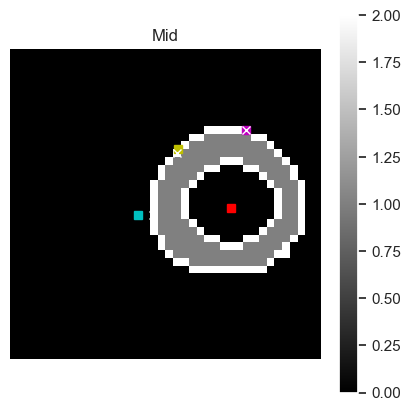

In [ ]:
slc = 0
fig = plt.figure(figsize = (5, 5), dpi= 100)
fig.patch.set_facecolor('white')
plt.imshow(LV_Mask[:, :, slc] + Epicardium_Contours[slc] + Endocardium_Contours[slc], cmap = 'gray', interpolation = 'none')
plt.colorbar()
plt.axis('off')
plt.plot(Anterior_RVIP[slc][1], Anterior_RVIP[slc][0], 'ms')
plt.plot(Inferior_RVIP[slc][1], Inferior_RVIP[slc][0], 'cs')
plt.plot(Mid_Septum[slc][1],    Mid_Septum[slc][0],    'ys')
plt.plot(Anterior_RVIP_snap[slc][1], Anterior_RVIP_snap[slc][0], 'wx')
plt.plot(Inferior_RVIP_snap[slc][1], Inferior_RVIP_snap[slc][0], 'wx')
plt.plot(Mid_Septum_snap[slc][1],    Mid_Septum_snap[slc][0],    'wx')
plt.plot(Endocardial_Centers[slc][1], Endocardial_Centers[slc][0], 'rs')
plt.title(Slice_Location[slc])

In [ ]:
AHA_Mask = AHA_17_Segment_Mask(LV_Mask, Slice_Location, Anterior_RVIP_snap, Mid_Septum_snap, 
                               Inferior_RVIP_snap, Endocardial_Centers)

hi


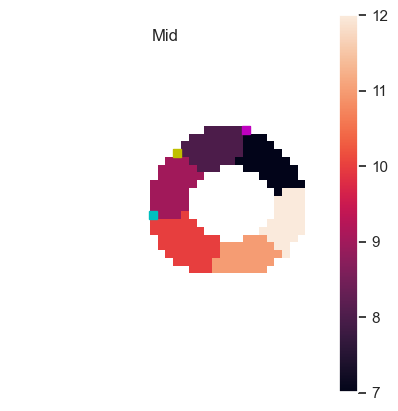

In [ ]:
slc = 0
fig = plt.figure(figsize = (5, 5), dpi= 100)
fig.patch.set_facecolor('white')
plt.imshow(AHA_Mask[:, :, slc])
plt.plot(Anterior_RVIP_snap[slc][1], Anterior_RVIP_snap[slc][0], 'ms')
plt.plot(Inferior_RVIP_snap[slc][1], Inferior_RVIP_snap[slc][0], 'cs')
plt.plot(Mid_Septum_snap[slc][1],    Mid_Septum_snap[slc][0],    'ys')
plt.title(Slice_Location[slc])
plt.axis('off')
plt.colorbar()

In [ ]:
from scipy.io import savemat
save_path = os.path.join(main_segmentation_path,'AHA_mask.mat')
savemat(save_path, {'AHA':AHA_Mask})